In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from skimage.io import imread           # imread() 이미지를 읽어 들인다
from skimage.transform import resize    # resize() 이미지의 크기를 변경할 수 있다.
from skimage.feature import hog         # hog() 해당 영역내의 픽셀 기울기의 히스토그램을 계산

<Figure size 432x288 with 0 Axes>

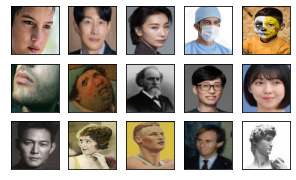

In [ ]:
#얼굴이미지가 저장된 폴더의 URL
url = 'https://github.com/Eunjung95/Eunjung95.github.io/raw/main/faces_new/'

face_images = []   #face_images 배열 선언

for i in range(15):
    file = url + 'img{0:02d}.jpg'.format(i+1)   # 이미지 파일 이름을 생성한다.
    img = imread(file)              # 이미지파일을 읽는다.
    img = resize(img, (64,64))      # 이미지 사이즈를 64x64로 변경한다.
    face_images.append(img)         # face_images에 append()함수를 사용하여 담는다


def plot_images(nRow, nCol, img):
    fig = plt.figure()
    fig, ax = plt.subplots(nRow, nCol, figsize = (nCol,nRow))
    for i in range(nRow):
        for j in range(nCol):
            if nRow <= 1: axis = ax[j]
            else:         axis = ax[i, j]
            axis.get_xaxis().set_visible(False)
            axis.get_yaxis().set_visible(False)
            axis.imshow(img[i*nCol+j])


plot_images(3,5, face_images)

(128,)


<Figure size 432x288 with 0 Axes>

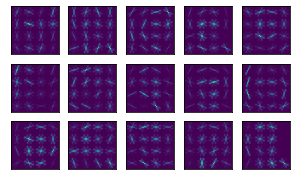

<Figure size 432x288 with 0 Axes>

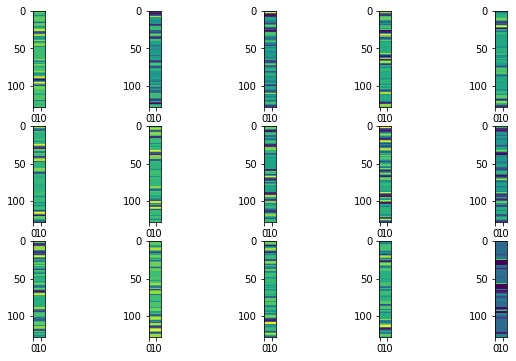

In [ ]:
face_hogs = []
face_features = []

for i in range(15):
    hog_desc, hog_image = hog(face_images[i], orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=True)
    face_hogs.append(hog_image)
    face_features.append(hog_desc)

plot_images(3, 5, face_hogs)

print(face_features[0].shape)

fig = plt.figure()
fig, ax = plt.subplots(3,5, figsize = (10,6))
for i in range(3):
    for j in range(5):
        ax[i, j].imshow(resize(face_features[i*5+j], (128,16)))

<Figure size 432x288 with 0 Axes>

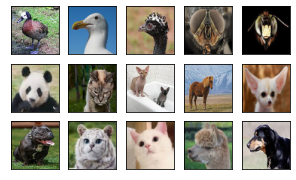

In [ ]:
url = 'https://github.com/Eunjung95/Eunjung95.github.io/raw/main/animals_new/'

animal_images = []

for i in range(15):
    file = url + 'img{0:02d}.jpg'.format(i+1)
    img = imread(file)
    img = resize(img, (64,64))
    animal_images.append(img)

plot_images(3, 5, animal_images)

<Figure size 432x288 with 0 Axes>

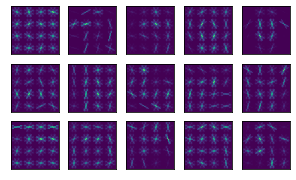

<Figure size 432x288 with 0 Axes>

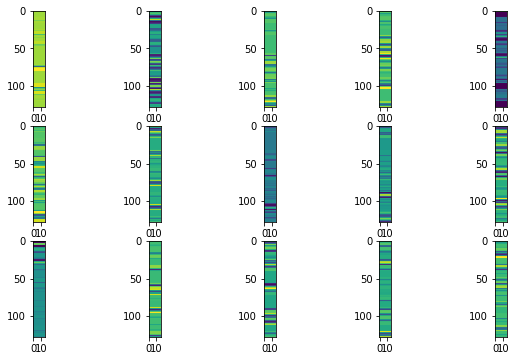

In [ ]:
animal_hogs = []
animal_features = []

for i in range(15):
    hog_desc, hog_image = hog(animal_images[i], orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=True)
    animal_hogs.append(hog_image)
    animal_features.append(hog_desc)

plot_images(3, 5, animal_hogs)

fig = plt.figure()
fig, ax = plt.subplots(3,5, figsize = (10,6))
for i in range(3):
 for j in range(5):
   ax[i, j].imshow(resize(animal_features[i*5+j], (128,16)))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


<Figure size 432x288 with 0 Axes>

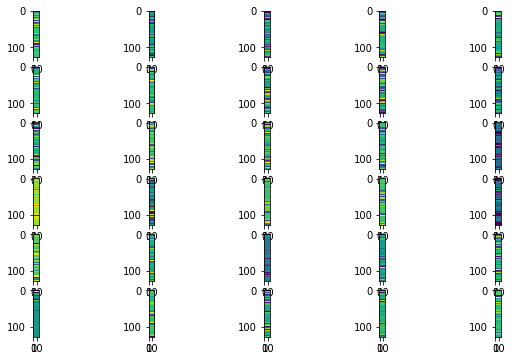

In [ ]:
X, y = [], []

for feature in face_features:
    X.append(feature)
    y.append(1)
for feature in animal_features:
    X.append(feature)
    y.append(0)

fig = plt.figure()
fig, ax = plt.subplots(6,5, figsize = (10,6))
for i in range(6):
 for j in range(5):
   ax[i, j].imshow(resize(X[i*5+j], (128,16)),interpolation='nearest')
print(y) 

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

polynomial_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(C=1, kernel = 'poly', degree=5, coef0=10.0))
 ])
polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=1, coef0=10.0, degree=5, kernel='poly'))])

In [ ]:
yhat = polynomial_svm_clf.predict(X)
print(yhat)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


<Figure size 432x288 with 0 Axes>

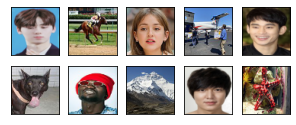

In [38]:
url = 'https://github.com/Eunjung95/Eunjung95.github.io/raw/main/faces_test/'

test_images = []

for i in range(10):
    file = url + 'img{0:02d}.jpg'.format(i+1)
    img = imread(file)
    img = resize(img, (64,64))
    test_images.append(img)

plot_images(2, 5, test_images)

<Figure size 432x288 with 0 Axes>

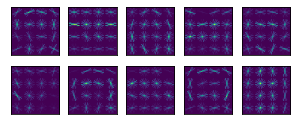

<Figure size 432x288 with 0 Axes>

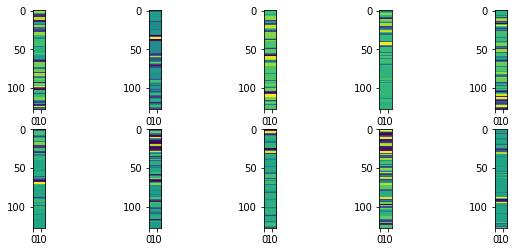

In [39]:
test_hogs = []
test_features = []
for i in range(10):
    hog_desc, hog_image = hog(test_images[i], orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=True)
    test_hogs.append(hog_image)
    test_features.append(hog_desc)

plot_images(2, 5, test_hogs)

fig = plt.figure()
fig, ax = plt.subplots(2,5, figsize = (10,4))
for i in range(2):
 for j in range(5):
   ax[i, j].imshow(resize(test_features[i*5+j], (128,16)), interpolation='nearest')

In [40]:
test_result = polynomial_svm_clf.predict(test_features)
print(test_result)

[1 0 0 0 1 0 1 0 1 0]


<Figure size 432x288 with 0 Axes>

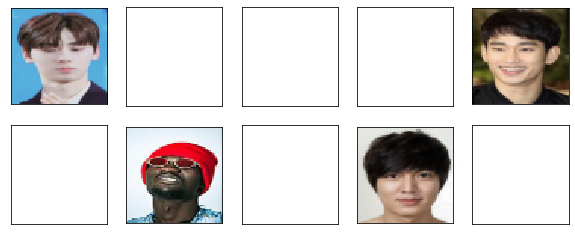

In [41]:
fig = plt.figure()
fig, ax = plt.subplots(2,5, figsize = (10,4))
for i in range(2):
    for j in range(5):
        ax[i, j].get_xaxis().set_visible(False)
        ax[i, j].get_yaxis().set_visible(False)
        if test_result[i*5+j] == 1:
            ax[i, j].imshow(test_images[i*5+j],interpolation='nearest')